## Import packages

In [4]:
!pip install scikit-plot
import scikitplot as skplt
from skimage import io
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix , plot_roc_curve , plot_confusion_matrix
from sklearn.metrics import accuracy_score , precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold

##Import Datasets

Dictionary of all folder of images, each folder of images is stored in a list with the folder name as the key
I have stored selected datasets in a folder called 'dataset'

In [5]:
dataset = {}
baseDir = 'C:/Users/elsha/Downloads/dataset'
dirs = os.listdir(baseDir)
# looping over all selected folders using dirs array
for folder_name in dirs:
  #create a list for each folder with the folder name as the key 
  dataset[folder_name] = []
  #store each image in its specified folder
  for file in os.listdir(baseDir+'/'+folder_name):
    dataset[folder_name].append(cv2.imread(baseDir+'/'+folder_name+'/'+file))

#Preprocessing

Image without any preprocessing

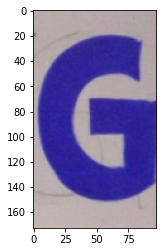

In [6]:
plt.imshow(dataset['char_g_dataset'][10])

##Converting BGR to GRAY

In [7]:
for key in list(dataset.keys()):
  for i in range(len(dataset[key])):
    dataset[key][i] = cv2.cvtColor(dataset[key][i], cv2.COLOR_BGR2GRAY)

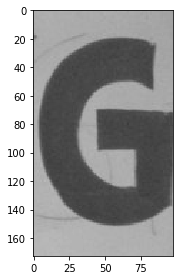

In [8]:
io.imshow(dataset['char_g_dataset'][10])

## Applying Canny

Used Canny Edge Detection which remove the noise in the image and then filtering with a Sobel kernel in both horizontal and vertical directions to clearly identify the edges

In [9]:
for key in list(dataset.keys()):
  for i in range(len(dataset[key])):
    dataset[key][i] = cv2.Canny(dataset[key][i], 100, 200)

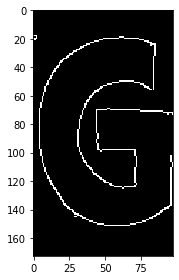

In [10]:
io.imshow(dataset['char_g_dataset'][10])

## Resizing Images

Resize Image (128 x 128) 

In [11]:
for key in list(dataset.keys()):
  for i in range(len(dataset[key])):
    dataset[key][i] = resize(dataset[key][i], (128, 128),
                       anti_aliasing=True)

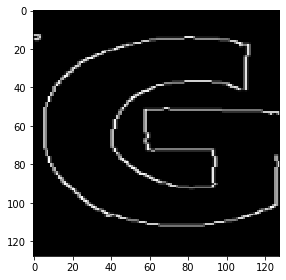

In [12]:
io.imshow(dataset['char_g_dataset'][10])

## Reshape the image

In [13]:
for key in list(dataset.keys()):
  for i in range(len(dataset[key])):
    dataset[key][i] = np.reshape(dataset[key][i],(-1))

# Binary Classification 'O' and 'Q'

## Data preperation

In [14]:
y_dataset_o = np.full(len(dataset['char_o_dataset']), 0)
y_dataset_q = np.full(len(dataset['char_q_dataset']), 1)
y = np.append(y_dataset_o,y_dataset_q)

generating two labeled arrays for each dataset and concatinating them to one list 'y' 

In [15]:
x_train_o = pd.DataFrame(dataset['char_o_dataset'])
x_train_q = pd.DataFrame(dataset['char_q_dataset'])
X = pd.concat([x_train_o,x_train_q],ignore_index=True)

concatinating both images dataset to one dataframe 'X'

##Logistic Regression Model 

I have used random sampling to split train and test datasets 
The data was splitted in train and test not including validation dataset because of two main reasons :


1.   The data is so small to be splitted to three datasets 
2.   we dont do hyperparameter tunning



In [16]:
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size=0.20, random_state=20,shuffle=True)
clf = LogisticRegression(solver='liblinear').fit(x_train, y_train)

## Metrics on training dataset

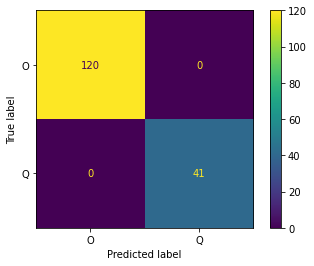

In [17]:
labels = ['O','Q']
train_y_pred = clf.predict(x_train)
plot_confusion_matrix(clf, x_train, y_train,display_labels=labels,values_format = '.5g')
plt.show()

As Expected, the model is over fitting the training data so there are no misclassified objects
as the confusion matrix shows, the false negative and false positive boxes have value of **0** so the model have predicted all lables.


Accuracy , Recall , Precision and F1-Score 

In [19]:
train_recall = 120/120
train_precision = 120/120
train_accuracy = (120+41)/(120+41)
train_f1_score = 2*train_precision*train_recall / (train_precision + train_recall)
print("Accuracy : "+str(train_accuracy))
print("Recall : "+str(train_recall))
print("Precision : "+str(train_precision))
print("F1 Score : "+str(train_f1_score))

Accuracy : 1.0
Recall : 1.0
Precision : 1.0
F1 Score : 1.0


the model overfitted the training data so the accuracy , recall , precision and f1-score have the same value = 1

ROC plot

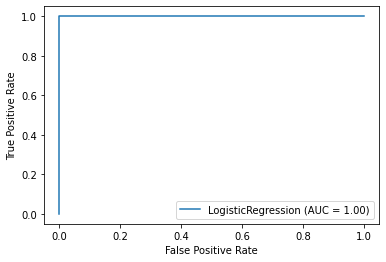

In [20]:
plot_roc_curve(clf, x_train, y_train)
plt.show()

the ROC curve have only one point in (False positive, True positive ) which is (1,1) as they have the same maximum value = 1,hence the model have reached its maximum rate and there are no room for enhancement with trying alternative threshold

## Metrics on testing dataset

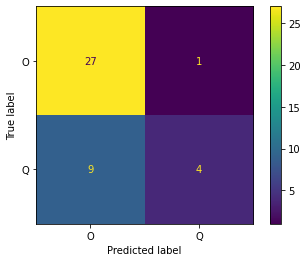

In [21]:
test_y_pred = clf.predict(x_test)
plot_confusion_matrix(clf, x_test, y_test,display_labels=labels,values_format = '.5g')
plt.show()

Accuracy , Recall , Precision and F1-Score 

In [23]:
test_recall = 27/(27+1)
test_precision = 27/(27+9)
test_accuracy = (27+4)/(27+1+9+4)
test_f1_score = 2*test_precision*test_recall / (test_precision + test_recall)
print("Accuracy : "+str(test_accuracy))
print("Recall : "+str(test_recall))
print("Precision : "+str(test_precision))
print("F1 Score : "+str(test_f1_score))

Accuracy : 0.7560975609756098
Recall : 0.9642857142857143
Precision : 0.75
F1 Score : 0.8437499999999999


the model has misclassified 10 samples from total of 41 samples which is not very good,
It is clearly obvious that the model have problems with predicting 'Q' letter and that because the data is imbalanced and the model has overfitted 'O' letter because it has more samples than 'Q' letter , so to overcome this problem is to oversample the 'Q' dataset by making data augmentation using for example rotation , scaling 

**ROC** Curve

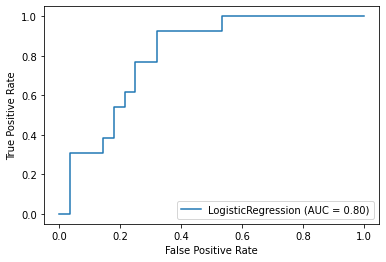

In [158]:
plot_roc_curve(clf, x_test, y_test)
plt.show()

The best threshold which gives AUC = 0.88 has false positive rate = 0.20 , true positive rate = 0.80 

#Binary Classification 'g' and '8'

## Data preperation

In [159]:
print('Class g has : '+str(len(dataset['char_g_dataset']))+" rows \nClass 8 has : "+str(len(dataset['num_8_dataset']))+" rows" )

Class g has : 143 rows 
Class 8 has : 32 rows


we want the dataset to be balanced as much as we can so the same amount of rows was selected from both classes based on the lowest labeled dataset which was **num 8** Class

In [24]:
y_dataset_8 = np.full(len(dataset['num_8_dataset']), 0)
y_dataset_g = np.full(len(dataset['char_g_dataset']), 1)
y = np.append(y_dataset_8,y_dataset_g)

appending training data of both characters on the same dataframe

In [25]:
x_train_8 = pd.DataFrame(dataset['char_g_dataset'])
x_train_g = pd.DataFrame(dataset['num_8_dataset'])
X = pd.concat([x_train_8,x_train_g],ignore_index=True)

##Logistic Regression Model 

I have used random sampling to split train and test datasets 
The data was splitted in train and test not including validation dataset because of two main reasons :


1.   The data is so small to be splitted to three datasets 
2.   we dont do hyperparameter tunning



In [26]:
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size=0.30, random_state=2)
clf = LogisticRegression(solver='liblinear').fit(x_train, y_train)

## Metrics on training dataset

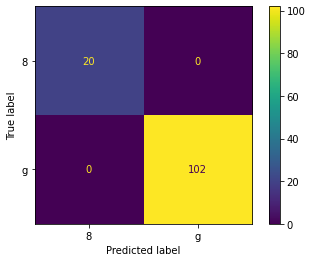

In [27]:
labels = ['8','g']
train_y_pred = clf.predict(x_train)
plot_confusion_matrix(clf, x_train,y_train,display_labels=labels,values_format = '.5g')
plt.show()

As Expected, the model is fitting the training data so there are no misclassified objects
as the confusion matrix shows, the false negative and false positive boxes have value of **0** so the model have predicted all lables correctly


Accuracy , Recall , Precision and F1-Score 

In [28]:
train_recall = 20/20
train_precision = 20/20
accuracy = (20+102)/(20+102)
train_f1_score = 2*train_precision*train_recall / (train_precision + train_recall)
print("Accuracy : "+str(accuracy))
print("Recall : "+str(train_recall))
print("Precision : "+str(train_precision))
print("F1 Score : "+str(train_f1_score))

Accuracy : 1.0
Recall : 1.0
Precision : 1.0
F1 Score : 1.0


ROC plot

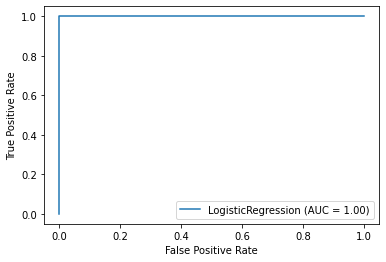

In [29]:
plot_roc_curve(clf, x_train, y_train)
plt.show()

the ROC curve have only one point in (False positive, True positive ) which is (1,1) as they have the same maximum value = 1,hence the model have reached its maximum rate and there are no room for enhancement with trying alternative threshold

## Metrics on testing dataset

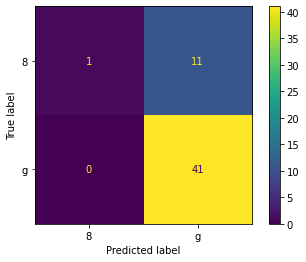

In [30]:
test_y_pred = clf.predict(x_test)
plot_confusion_matrix(clf, x_test, y_test,display_labels=labels,values_format = '.5g')
plt.show()

Accuracy , Recall , Precision and F1-Score 

In [31]:
test_recall = 1/12
test_precision = 1/1
accuracy = (1+41)/(1+11+41)
test_f1_score = 2*test_precision*test_recall / (test_precision + test_recall)
print("Accuracy : "+str(accuracy))
print("Recall : "+str(test_recall))
print("Precision : "+str(test_precision))
print("F1 Score : "+str(test_f1_score))

Accuracy : 0.7924528301886793
Recall : 0.08333333333333333
Precision : 1.0
F1 Score : 0.15384615384615385


the model has misclassified 12 samples out of 53 which is not very bad if we are talking about accuracy which is 0.77 ,
But it is clearly obvious that the model have problems with predicting number '8' , the model has predicted only 1 sample out of 11 which is very bad , it was reflected on Recall which has 0.083 and that because the data is imbalanced , biased and overfitted to 'g' class because it has more samples than '8' class , so to overcome this problem is to oversample the '8' class by making data augmentation using for example rotation , scaling 

ROC plot

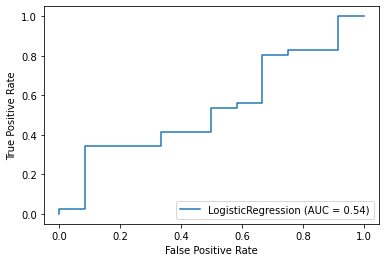

In [171]:
plot_roc_curve(clf, x_test, y_test)
plt.show()

# Multiclass Classifier

## Data preperation

In [32]:
print('Class O has : '+str(len(dataset['char_o_dataset']))+" rows")
print("Class Q has : "+str(len(dataset['char_q_dataset']))+ " rows")
print("Class 8 has : "+str(len(dataset['num_8_dataset']))+ " rows")
print("Class G has : "+str(len(dataset['char_g_dataset']))+ " rows")

Class O has : 148 rows
Class Q has : 54 rows
Class 8 has : 32 rows
Class G has : 143 rows


In [33]:
dataset_o = dataset['char_o_dataset']
dataset_q = dataset['char_q_dataset']
dataset_8 = dataset['num_8_dataset']
dataset_g = dataset['char_g_dataset']

In [34]:
y_dataset_o = np.full(len(dataset_o), 0)
y_dataset_q = np.full(len(dataset_q), 1)
y_dataset_8 = np.full(len(dataset_8), 2)
y_dataset_g = np.full(len(dataset_g), 3)
y= np.concatenate([y_dataset_o,y_dataset_q,y_dataset_8,y_dataset_g])

In [35]:
x_train_o = pd.DataFrame(dataset_o)
x_train_q = pd.DataFrame(dataset_q)
x_train_8 = pd.DataFrame(dataset_8)
x_train_g = pd.DataFrame(dataset_g)
X = pd.concat([x_train_o,x_train_q,x_train_8,x_train_g],ignore_index=True)

I have used random sampling to split train and test datasets 
The data was splitted in train and test not including validation dataset because of two main reasons :


1.   The data is so small to be splitted to three datasets 
2.   we dont do hyperparameter tunning



##Logistic Regression Model 

In [36]:
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size=0.20, random_state=20)
clf = LogisticRegression(solver='liblinear').fit(x_train, y_train)

## Metrics on training dataset

Accuracy , Recall , Precision and F1-Score 

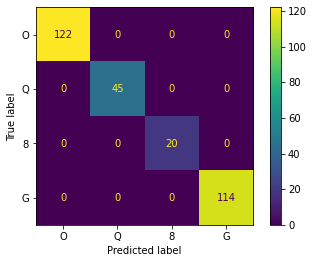

In [37]:
labels = ['O','Q','8','G']
train_y_pred = clf.predict(x_train)
train_confusion_matrix= confusion_matrix(y_train, train_y_pred)
plot_confusion_matrix(clf, x_train, y_train,display_labels=labels,values_format = '.5g')
plt.show()

In [38]:
train_recall = ((122/122)+(45/45)+(20/20)+(114/114))/4
train_precision = ((122/122)+(45/45)+(20/20)+(114/114))/4
train_accuracy = (16+45+20+114) / (16+45+20+114)
train_f1_score = 2*train_precision*train_recall / (train_precision + train_recall)
print("Accuracy : "+str(train_accuracy))
print("Recall : "+str(train_recall))
print("Precision : "+str(train_precision))
print("F1 Score : "+str(train_f1_score))

Accuracy : 1.0
Recall : 1.0
Precision : 1.0
F1 Score : 1.0


As Expected, the model is fitting the training data so there are no misclassified objects as shown , the left diagonal boxes are all true positives values which contains the number of samples that the model have predicted correctly, and the other boxes refere to the number of samples that the model have misclassified for each class, because of the there are no boxes out of the left diagonal contains any value greater than 0, then the model have predicted all classes correctly and that is expected because the model overfitte the data cause it was tested on data that it was trained on.
which also is reflected on the values of accuracy , recall , precision and f1-score all of them have value of 1 meaning that the model predicts all the training data correctly 


ROC plot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


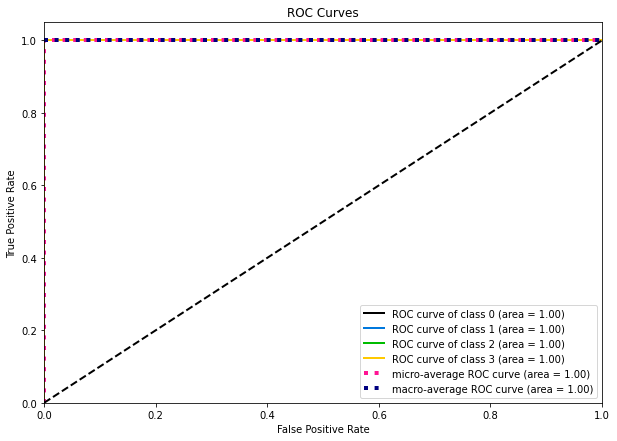

In [67]:
y_probas = clf.predict_proba(x_train)
fig, ax = plt.subplots(figsize=(10, 7))
skplt.metrics.plot_roc_curve(y_train, y_probas,ax=ax)
plt.show()

## Metrics on testing dataset

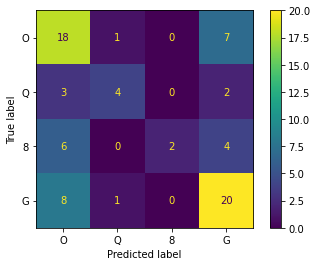

In [39]:
test_y_pred = clf.predict(x_test)
test_confusion_matrix= confusion_matrix(y_test, test_y_pred)
plot_confusion_matrix(clf, x_test, y_test,values_format = '.5g',display_labels=labels)
plt.show()

Accuracy , Recall , Precision and F1-Score 

As expected , the model is facing underfitting problem, the model has not predicted almost half of the samples and that because of that the data is imbalanced and small as well.
the model has problems in classifing 'g' and 'o' because it has been distracted between them in 15 samples ,it misclassified 'g' as 'O' in 7 times and misclassified 'O' as 'G' in 8 times
also '8' class has been predicted correctly 2 times out of 12 which is very poor performance which is also happening because of the class doesnt have enough data to be trained on so that we can augemnt more data for that class 


In [40]:
test_recall = (( 18/(18+1+0+7) ) + ( 4/(3+4+0+2) ) + (2/(6+0+2+4) )+ (20/(8+1+0+20)))/4
test_precision = ((18/(18+3+6+8)) + (4/(1+4+0+1)) + (2/2)+(20/(20+7+2+4)))/4
test_accuracy = (18+4+2+20)/(18+3+6+8+1+4+0+1+7+2+4+20)
f1_score = 2*test_precision*test_recall / (test_precision + test_recall)
print("Accuracy : "+str(test_accuracy))
print("Recall : "+str(test_recall))
print("Precision : "+str(test_precision))
print("F1 Score : "+str(f1_score))

Accuracy : 0.5945945945945946
Recall : 0.49826849395814915
Precision : 0.6967532467532467
F1 Score : 0.581027405766728


ROC plot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


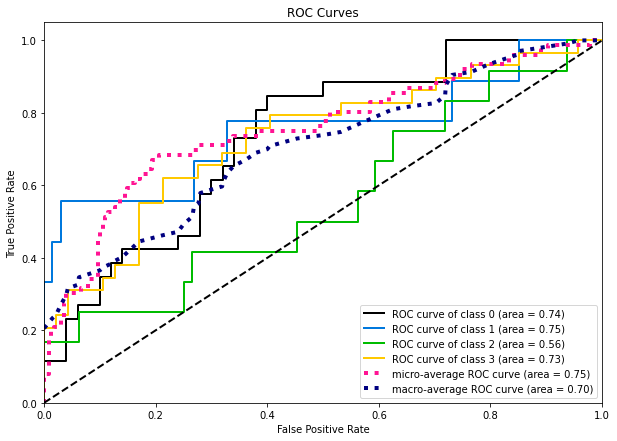

In [41]:
y_probas = clf.predict_proba(x_test)
fig, ax = plt.subplots(figsize=(10, 7))
skplt.metrics.plot_roc_curve(y_test, y_probas,ax=ax)
plt.show()

we can clearly see that class 2 '8' is the least performing class and that beacause the imbalanced data problem.
and the best performing class is 